In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mynetwork
import data

In [3]:
# 训练集：测试集 = 6：4
train_datas, test_datas = data.data_loader()
num_of_test = len(test_datas)
# 基础参数,下面的对比说明为什么选择这些作为基本参数
layers = [22,50,100,2]
epochs = 30
mini_batch = 10
eta = 0.5
lmbda = 0.1

In [4]:
net_one = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
net_one.large_weight_initializer()

In [5]:
accuracy = net_one.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
                      monitor_evaluation_accuracy = True)

Epoch 0 training complete
Accuracy on evaluation data: 2969 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 3034 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 3059 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 3094 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 3130 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 3175 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 3214 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3235 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3205 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3241 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3248 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3234 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3225 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3205 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 32

In [6]:
net_one.save("model.json")

In [7]:
def make_plot(epochs, ls1, ls2, label1, label2, title):
    fig, ax = plt.subplots()
    ax.plot(np.arange(1,epochs+1,1), ls1, 'rx--', color = '#2A6EA6', label = label1)
    ax.plot(np.arange(1,epochs+1,1), ls2, 'bo:', color = '#FFA933', label = label2)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    plt.legend(loc = 'best')
    plt.savefig(title)
    plt.show()

In [8]:
# 对比1 分别使用交叉熵和二次代价函数
def compare_cost():
    net1 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net2 = mynetwork.Network(layers, cost=mynetwork.CrossEntropyCost)
    net1.large_weight_initializer()
    net2.large_weight_initializer()
    
    evaluation_accuracy1 = net1.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy2 = net2.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    make_plot(epochs, evaluation_accuracy1, evaluation_accuracy2,\
              "Evaluation_accuracy_Quadratic", "Evaluation_accuracy_CrossEntropy",\
              "CompareofCost")

Epoch 0 training complete
Accuracy on evaluation data: 2948 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 2989 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 3048 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 2934 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 3129 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 3175 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 3200 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3215 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3225 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3226 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3234 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3237 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3236 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3230 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 32

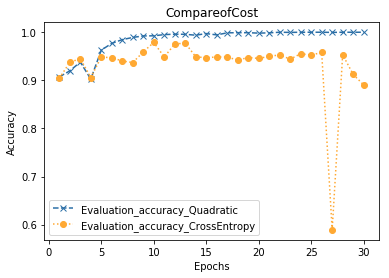

In [9]:
compare_cost()

In [10]:
# 对比2 隐藏层的对比
def compare_layers():
    layers1 = [22,30,2]
    layers2 = [22,50,2]
    layers3 = [22,30,100,2]
    layers4 = [22,50,100,2]
    net1 = mynetwork.Network(layers1, cost=mynetwork.QuadraticCost)
    net2 = mynetwork.Network(layers2, cost=mynetwork.QuadraticCost)
    net3 = mynetwork.Network(layers3, cost=mynetwork.QuadraticCost)
    net4 = mynetwork.Network(layers4, cost=mynetwork.QuadraticCost)
    net1.large_weight_initializer()
    net2.large_weight_initializer()
    net3.large_weight_initializer()
    net4.large_weight_initializer()

    evaluation_accuracy1 = net1.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy2 = net2.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy3 = net3.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy4 = net4.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy1, 'x-', color='red', label = '[22,30,2]')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy2, 'o-', color='blue', label = '[22,50,2]')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy3, 'x-', color='green', label = '[22,30,100,2]')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy4, 'o-', color='yellow', label = '[22,50,100,2]')
    ax.set_xlim([1,31])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('CompareofLayers')
    plt.legend(loc='best')
    plt.savefig('CompareofLayers')
    plt.show()

Epoch 0 training complete
Accuracy on evaluation data: 2995 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 3042 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 3070 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 3095 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 3166 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 3212 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 3202 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3219 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3227 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3235 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3237 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3237 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3238 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3249 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 31

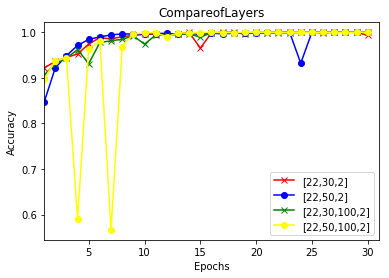

In [11]:
compare_layers()

In [12]:
# 对比2 隐藏层的对比---局部图
def compare_layers():
    layers1 = [22,30,2]
    layers2 = [22,50,2]
    layers3 = [22,30,100,2]
    layers4 = [22,50,100,2]
    net1 = mynetwork.Network(layers1, cost=mynetwork.QuadraticCost)
    net2 = mynetwork.Network(layers2, cost=mynetwork.QuadraticCost)
    net3 = mynetwork.Network(layers3, cost=mynetwork.QuadraticCost)
    net4 = mynetwork.Network(layers4, cost=mynetwork.QuadraticCost)
    net1.large_weight_initializer()
    net2.large_weight_initializer()
    net3.large_weight_initializer()
    net4.large_weight_initializer()

    evaluation_accuracy1 = net1.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy2 = net2.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy3 = net3.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy4 = net4.SGD(train_datas, epochs, mini_batch, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(18,epochs+1,1), evaluation_accuracy1[-13:], 'x-', color='red', label = '[22,30,2]')
    ax.plot(np.arange(18,epochs+1,1), evaluation_accuracy2[-13:], 'o-', color='blue', label = '[22,50,2]')
    ax.plot(np.arange(18,epochs+1,1), evaluation_accuracy3[-13:], 'x-', color='green', label = '[22,30,100,2]')
    ax.plot(np.arange(18,epochs+1,1), evaluation_accuracy4[-13:], 'o-', color='yellow', label = '[22,50,100,2]')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('CompareofLayers')
    plt.legend(loc='best')
    plt.savefig('CompareofLayers2')
    plt.show()

Epoch 0 training complete
Accuracy on evaluation data: 2987 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 2788 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 2858 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 3147 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 3150 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 3197 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 3209 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3116 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3233 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3244 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3155 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3242 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3248 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3231 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 32

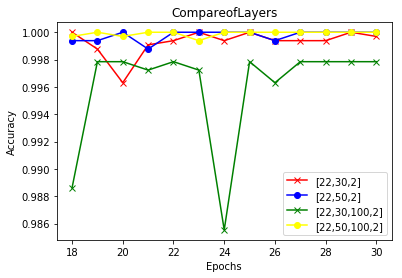

In [13]:
compare_layers()

In [14]:
# 对比3 小批次大小
def compare_mini_batch():
    batch1 = 10
    batch2 = 20
    batch3 = 100
    batch4 = 5
    net1 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net2 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net3 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net4 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net1.large_weight_initializer()
    net2.large_weight_initializer()
    net3.large_weight_initializer()
    net4.large_weight_initializer()

    evaluation_accuracy1 = net1.SGD(train_datas, epochs, batch1, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy2 = net2.SGD(train_datas, epochs, batch2, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy3 = net3.SGD(train_datas, epochs, batch3, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy4 = net4.SGD(train_datas, epochs, batch4, eta, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy1, 'x-', color='red', label = 'mini_batch=10')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy2, 'o-', color='blue', label = 'mini_batch=20')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy3, 'x-', color='green', label = 'mini_batch=100')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy4, 'o-', color='black', label = 'mini_batch=5')
    
    ax.set_xlim([1,31])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('CompareofMinibatch')
    plt.legend(loc='best')
    plt.savefig('CompareofMinibatch')
    plt.show()

Epoch 0 training complete
Accuracy on evaluation data: 2839 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 3030 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 3086 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 3180 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 3190 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 3205 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 3107 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3221 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3231 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3238 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3243 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3239 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3250 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3250 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 32

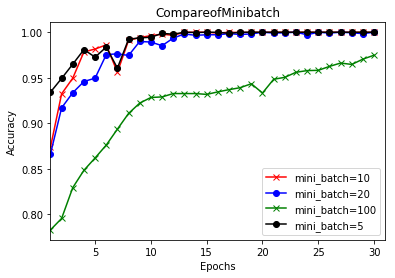

In [15]:
compare_mini_batch()

In [16]:
# 对比四 学习率
def compare_eta():
    eta1 = 0.05
    eta2 = 0.5
    eta3 = 10
    eta4 = 50
    net1 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net2 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net3 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net4 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net1.large_weight_initializer()
    net2.large_weight_initializer()
    net3.large_weight_initializer()
    net4.large_weight_initializer()

    evaluation_accuracy1 = net1.SGD(train_datas, epochs, mini_batch, eta1, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy2 = net2.SGD(train_datas, epochs, mini_batch, eta2, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy3 = net3.SGD(train_datas, epochs, mini_batch, eta3, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy4 = net4.SGD(train_datas, epochs, mini_batch, eta4, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy1, 'x-', color='red', label = 'eta=0.05')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy2, 'o-', color='blue', label = 'eta=0.5')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy3, 'x-', color='green', label = 'eta=10')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy4, 'o-', color='yellow', label = 'eta=50')
    
    ax.set_xlim([1,31])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('CompareofEta')
    plt.legend(loc='best')
    plt.savefig('CompareofEta')
    plt.show()

Epoch 0 training complete
Accuracy on evaluation data: 2369 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 2570 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 2691 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 2812 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 2872 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 2915 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 2984 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3001 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3021 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3033 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3037 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3044 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3049 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3052 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 30

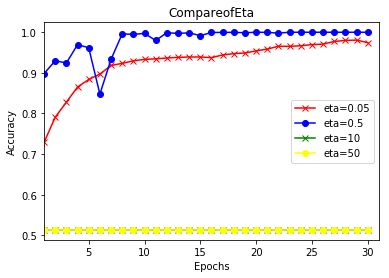

In [17]:
compare_eta()

In [18]:
# 对比五 正则化参数
def compare_lmbda():
    lmbda1 = 0.1
    lmbda2 = 0.5
    lmbda3 = 5
    lmbda4 = 50
    net1 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net2 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net3 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net4 = mynetwork.Network(layers, cost=mynetwork.QuadraticCost)
    net1.large_weight_initializer()
    net2.large_weight_initializer()
    net3.large_weight_initializer()
    net4.large_weight_initializer()

    evaluation_accuracy1 = net1.SGD(train_datas, epochs, mini_batch, eta, lmbda = lmbda1, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy2 = net2.SGD(train_datas, epochs, mini_batch, eta, lmbda = lmbda2, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy3 = net3.SGD(train_datas, epochs, mini_batch, eta, lmbda = lmbda3, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    evaluation_accuracy4 = net4.SGD(train_datas, epochs, mini_batch, eta, lmbda = lmbda4, evaluation_data = test_datas, \
              monitor_evaluation_accuracy = True)
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy1, 'x-', color='red', label = 'lmbda=0.1')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy2, 'o-', color='red', label = 'lmbda=0.5')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy3, 'x-', color='green', label = 'lmbda=5')
    ax.plot(np.arange(1,epochs+1,1), evaluation_accuracy4, 'o-', color='yellow', label = 'lmbda=50')
    
    ax.set_xlim([1,31])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Compareoflmbda')
    plt.legend(loc='best')
    plt.savefig('Compareoflmbda')
    plt.show()

Epoch 0 training complete
Accuracy on evaluation data: 2894 / 3250
Epoch 1 training complete
Accuracy on evaluation data: 2928 / 3250
Epoch 2 training complete
Accuracy on evaluation data: 3017 / 3250
Epoch 3 training complete
Accuracy on evaluation data: 3107 / 3250
Epoch 4 training complete
Accuracy on evaluation data: 3138 / 3250
Epoch 5 training complete
Accuracy on evaluation data: 3218 / 3250
Epoch 6 training complete
Accuracy on evaluation data: 3212 / 3250
Epoch 7 training complete
Accuracy on evaluation data: 3205 / 3250
Epoch 8 training complete
Accuracy on evaluation data: 3222 / 3250
Epoch 9 training complete
Accuracy on evaluation data: 3188 / 3250
Epoch 10 training complete
Accuracy on evaluation data: 3231 / 3250
Epoch 11 training complete
Accuracy on evaluation data: 3240 / 3250
Epoch 12 training complete
Accuracy on evaluation data: 3245 / 3250
Epoch 13 training complete
Accuracy on evaluation data: 3158 / 3250
Epoch 14 training complete
Accuracy on evaluation data: 32

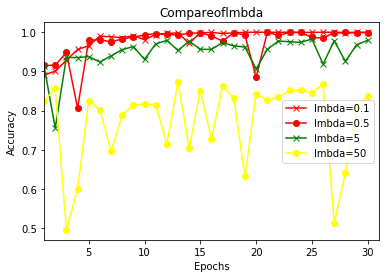

In [19]:
compare_lmbda()